In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl

In [2]:
df=pd.read_csv('C:/Users/Rory/Downloads/price_paid_records.csv',index_col = 'Transaction unique identifier')
df['Date of Transfer'] = pd.to_datetime(df['Date of Transfer'])
df['Date of Transfer'].dtype

dtype('<M8[ns]')

In [3]:
df.columns

Index(['Price', 'Date of Transfer', 'Property Type', 'Old/New', 'Duration',
       'Town/City', 'District', 'County', 'PPDCategory Type',
       'Record Status - monthly file only'],
      dtype='object')

In [4]:
(df['County']== 'CARDIFF').value_counts()

False    22355233
True       134115
Name: County, dtype: int64

In [5]:
#Removing all house sales not in Cardiff
notcardiff=df[df['County']!='CARDIFF'].index
df.drop(notcardiff, inplace=True)
(df['County']== 'CARDIFF').value_counts()

True    134115
Name: County, dtype: int64

In [6]:
#Checking for missing values
df.isnull().sum()

Price                                0
Date of Transfer                     0
Property Type                        0
Old/New                              0
Duration                             0
Town/City                            0
District                             0
County                               0
PPDCategory Type                     0
Record Status - monthly file only    0
dtype: int64

Sampling - The dataset is too large for analysis and model building, therefore, I must reduce the size. I want to sample the dataset to best achieve an even spread of samples in Data of Transfer.

In [7]:
df['Property Type'].value_counts()

T    53206
S    33187
F    28154
D    19085
O      483
Name: Property Type, dtype: int64

The largest property type is terrace house - also the property type of my interest. 
Removing other property types will make this more managable and any models created more accurate FOR MY PURPOSE

In [8]:
notterrace=df[df['Property Type']!='T'].index
df.drop(notterrace, inplace=True)
df['Property Type'].value_counts()

T    53206
Name: Property Type, dtype: int64

In [9]:
df.drop(['PPDCategory Type','Record Status - monthly file only','Town/City','District','County'],axis=1)
df.head()

,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
Transaction unique identifier,,,,,,,,,,
{742E87B7-5134-487D-8370-1E456AACB593},35450,1995-07-14,T,Y,F,CARDIFF,CARDIFF,CARDIFF,A,A
{D32149A0-38C6-4941-B288-423F13479616},43500,1995-12-07,T,N,F,CARDIFF,CARDIFF,CARDIFF,A,A
{24DF25B8-94E7-41A3-9356-554B70405C36},21000,1995-10-26,T,N,F,CARDIFF,CARDIFF,CARDIFF,A,A
{CB8C758E-8EE7-4B8B-88CA-58C34A33B833},28700,1995-10-20,T,N,F,CARDIFF,CARDIFF,CARDIFF,A,A
{0DB1DE63-226D-4A0B-867A-58C5E8336201},31000,1995-11-30,T,N,F,CARDIFF,CARDIFF,CARDIFF,A,A


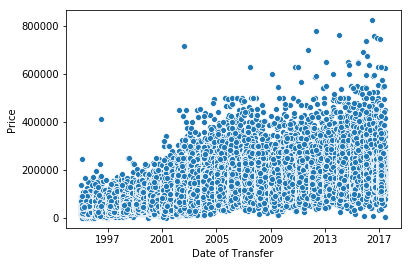

In [10]:
ax=sns.scatterplot(x="Date of Transfer", y="Price", data=df)

In [11]:
#df['Date of Transfer'].hist(bins=22)

In [12]:
#Outlier removal - lets get rid of those million pound houses.....
df['Year']=df['Date of Transfer'].dt.year
outliers=[]
threshold=3
yr_mean=pd.DataFrame(df.groupby(['Year'], as_index=False)['Price'].mean().set_index('Year'))
yr_std=pd.DataFrame(df.groupby(['Year'], as_index=False).agg({'Price':['std']}).set_index('Year'))

for d in df['Year'].unique():                
    for label, row in df.iterrows():
        if row['Year']==d:
            z_score= np.divide(np.subtract(row['Price'], (yr_mean.values[yr_mean.index==d])),(yr_std.values[yr_std.index==d]))
            if np.abs(z_score) > threshold:
                outliers.append(label)
        
#Removing outliers
b4size=df['Price'].value_counts()
for i in outliers:
    df.drop(i , inplace=True)
aftsize=df['Price'].value_counts()
print(b4size)
print('House sales before outlier removal')
print(b4size-aftsize)
print('House sales removed')


125000    662
120000    621
150000    613
140000    561
135000    558
130000    550
145000    528
110000    525
115000    496
165000    478
160000    468
60000     451
180000    446
175000    435
155000    425
95000     422
59950     414
170000    407
105000    378
185000    364
100000    360
85000     359
90000     358
75000     345
45000     335
55000     327
80000     322
70000     315
50000     305
190000    298
         ... 
64302       1
355260      1
89050       1
25565       1
117800      1
44100       1
7250        1
183400      1
165025      1
50345       1
119979      1
675000      1
238789      1
101600      1
64750       1
167200      1
232800      1
122250      1
11700       1
13751       1
114150      1
134640      1
69200       1
185995      1
100001      1
126700      1
192300      1
155450      1
157501      1
230495      1
Name: Price, Length: 3030, dtype: int64
House sales before outlier removal
430       0.0
600       0.0
750       0.0
1000      0.0
1121      0.0
1

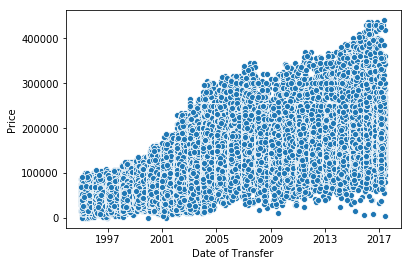

In [13]:
ax=sns.scatterplot(x="Date of Transfer", y="Price", data=df)

Exploratory Data Analysis

Text(0.5,1,'Average Sale Price : Property Age')

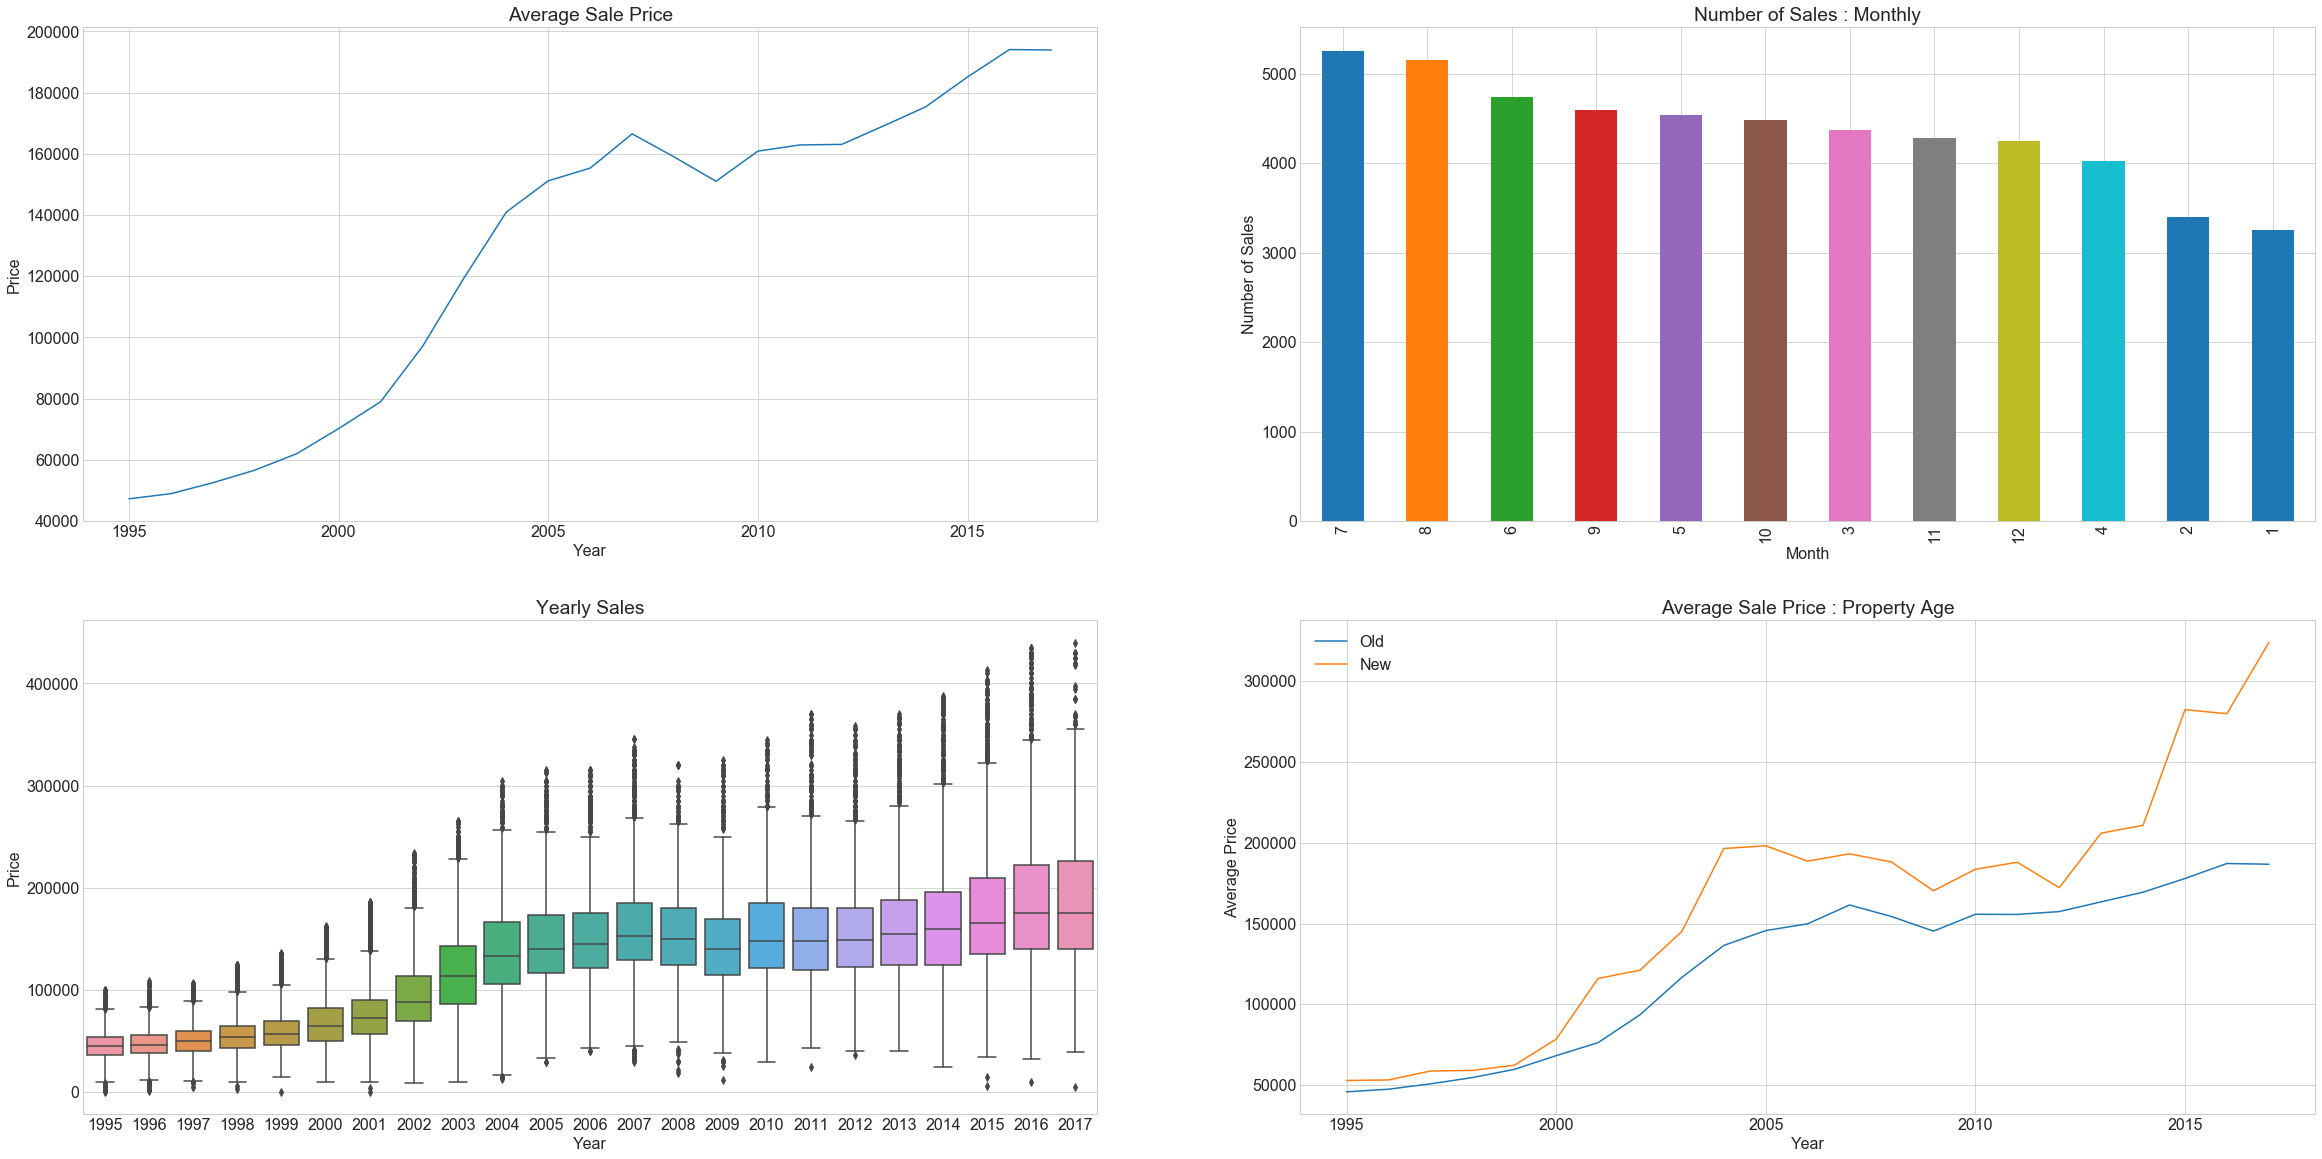

In [14]:
plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=(40,20))
font = { 'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

plt.subplot(2,2,1)
sns.lineplot(x="Year",y="Price",data=yr_mean.reset_index())
plt.title('Average Sale Price')
plt.subplot(2,2,2)
df['Date of Transfer'].dt.month.value_counts().plot('bar')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Number of Sales : Monthly')

plt.subplot(2,2,3)
sns.boxplot(x='Year',y="Price",data=df)
plt.title('Yearly Sales')

plt.subplot(2,2,4)
old=df[df["Old/New"]=="N"]
new=df[df["Old/New"]=="Y"]
old.groupby("Year").Price.mean().plot()
new.groupby("Year").Price.mean().plot()
plt.legend(['Old','New'])
plt.ylabel('Average Price')
plt.title('Average Sale Price : Property Age')

In [15]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
#Plot rolling statistics:
    plt.figure(figsize=(40,20))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [16]:
tsd=df
tsd.set_index('Date of Transfer', inplace = True)
tsd.index
#converting to time series
ts=tsd['Price']
ts.head(10)

Date of Transfer
1995-07-14    35450
1995-12-07    43500
1995-10-26    21000
1995-10-20    28700
1995-11-30    31000
1995-08-02    33000
1995-10-20    40500
1995-07-10    54000
1995-12-15    40500
1995-07-21    55000
Name: Price, dtype: int64

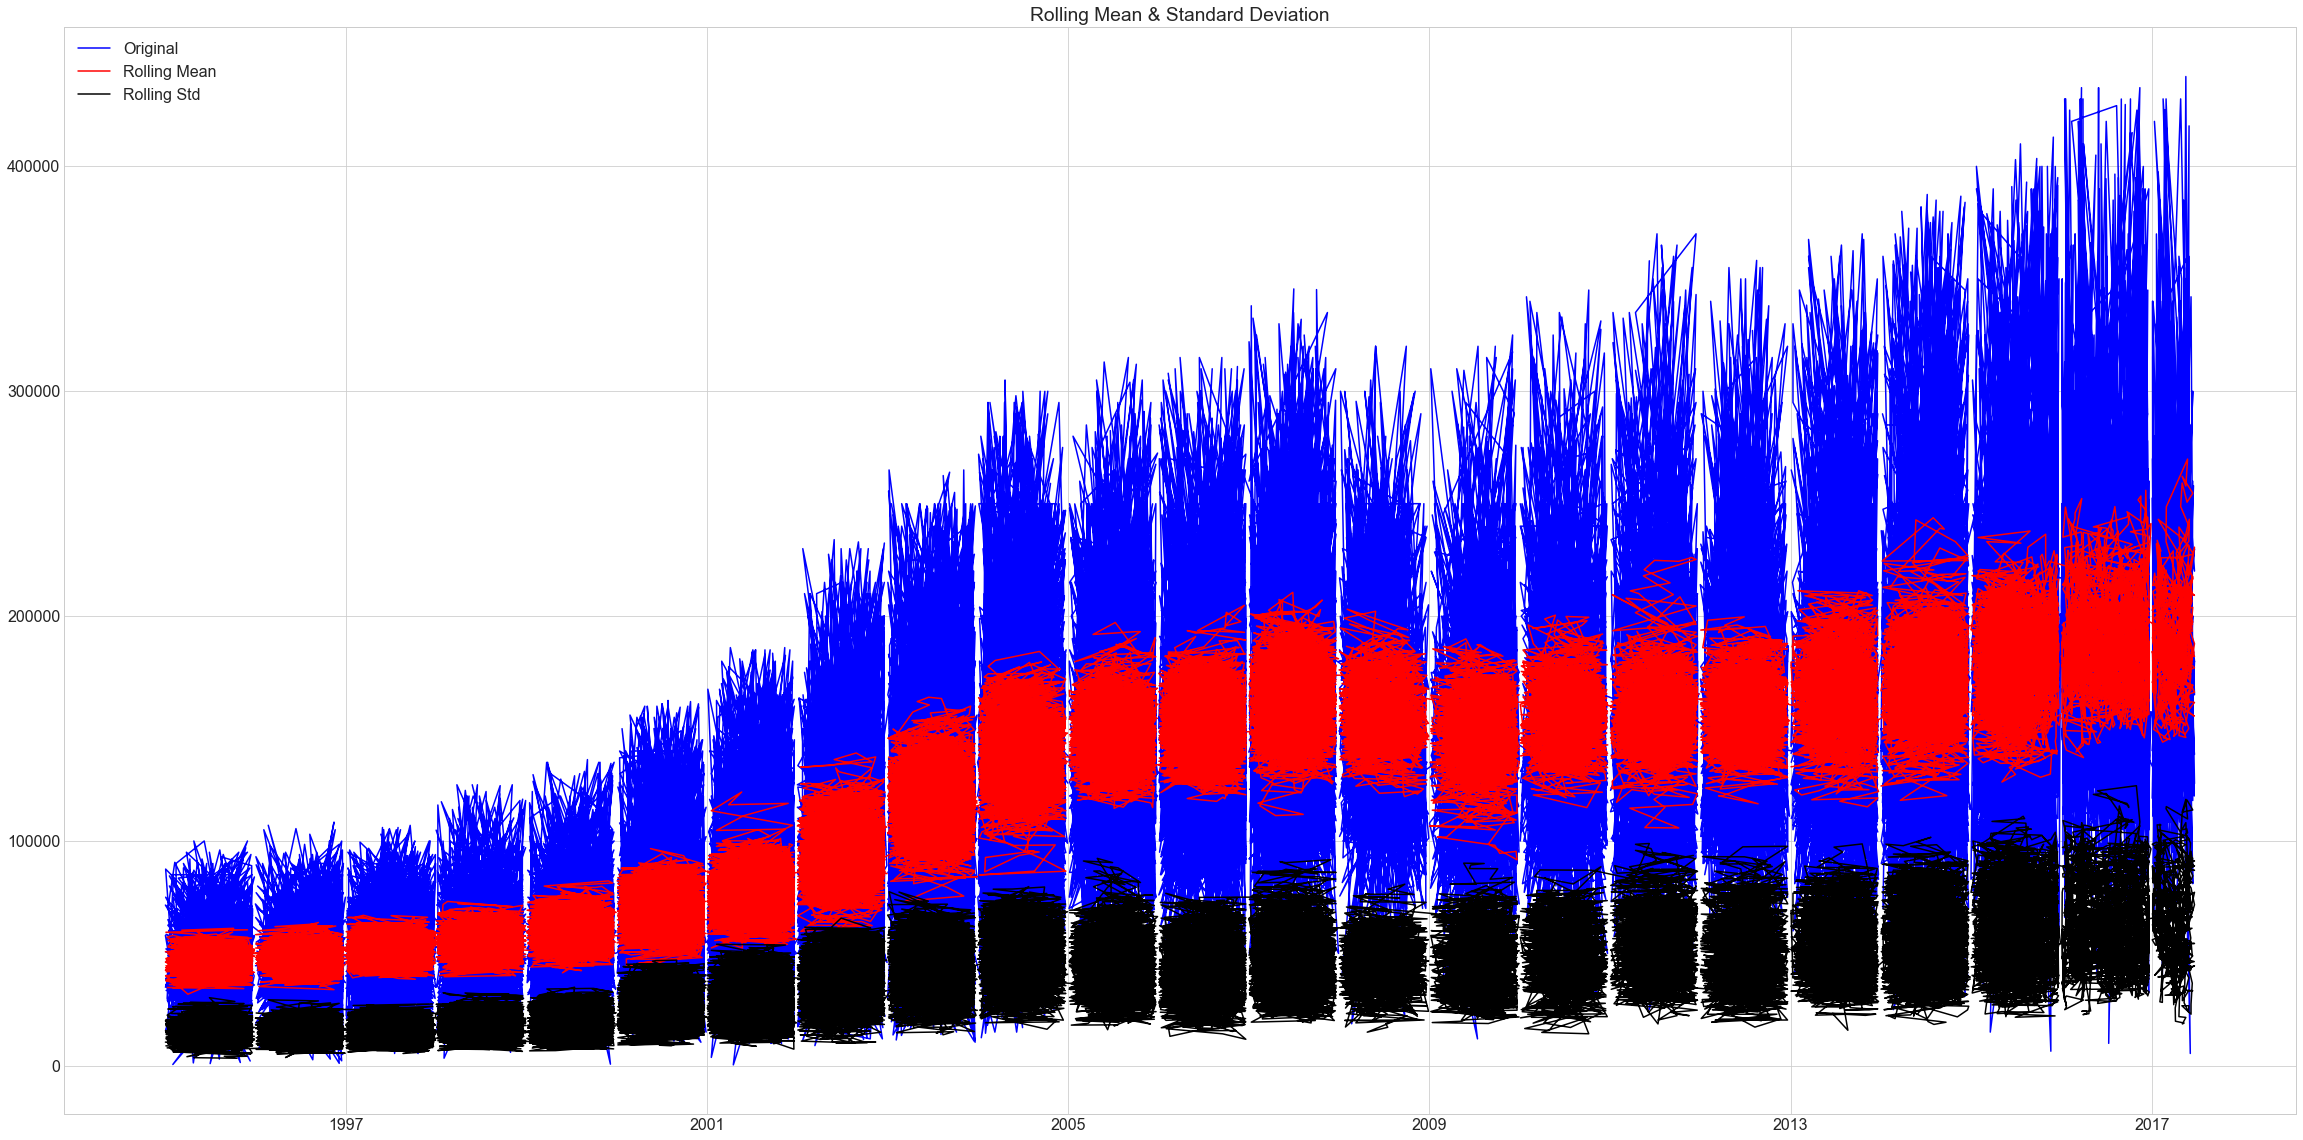

Results of Dickey-Fuller Test:
Test Statistic                    -3.607292
p-value                            0.005623
#Lags Used                        58.000000
Number of Observations Used    52287.000000
Critical Value (1%)               -3.430475
Critical Value (5%)               -2.861595
Critical Value (10%)              -2.566799
dtype: float64


In [17]:
test_stationarity(ts)

Time series is not stationary:
- the mean is increasing over time even though the standard deviation is small
- Test statistic is greater than the critical values

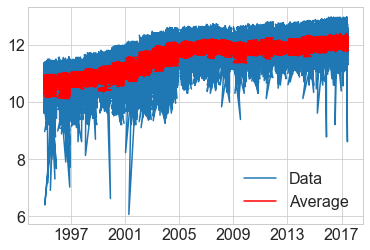

In [18]:
tslog=np.log(ts)
mov_avg=pd.Series(tslog).rolling(window=12).mean()
plt.plot(tslog)
plt.plot(mov_avg,color='red')
plt.legend(['Data','Average'])
#shows positive trend

Removing the trend with rolling average smoothing

In [19]:
tslog_smoothed=tslog-mov_avg
tslog.replace([np.inf, -np.inf], np.nan)
tslog_smoothed.isnull().value_counts()
tslog_smoothed.dropna(inplace=True)


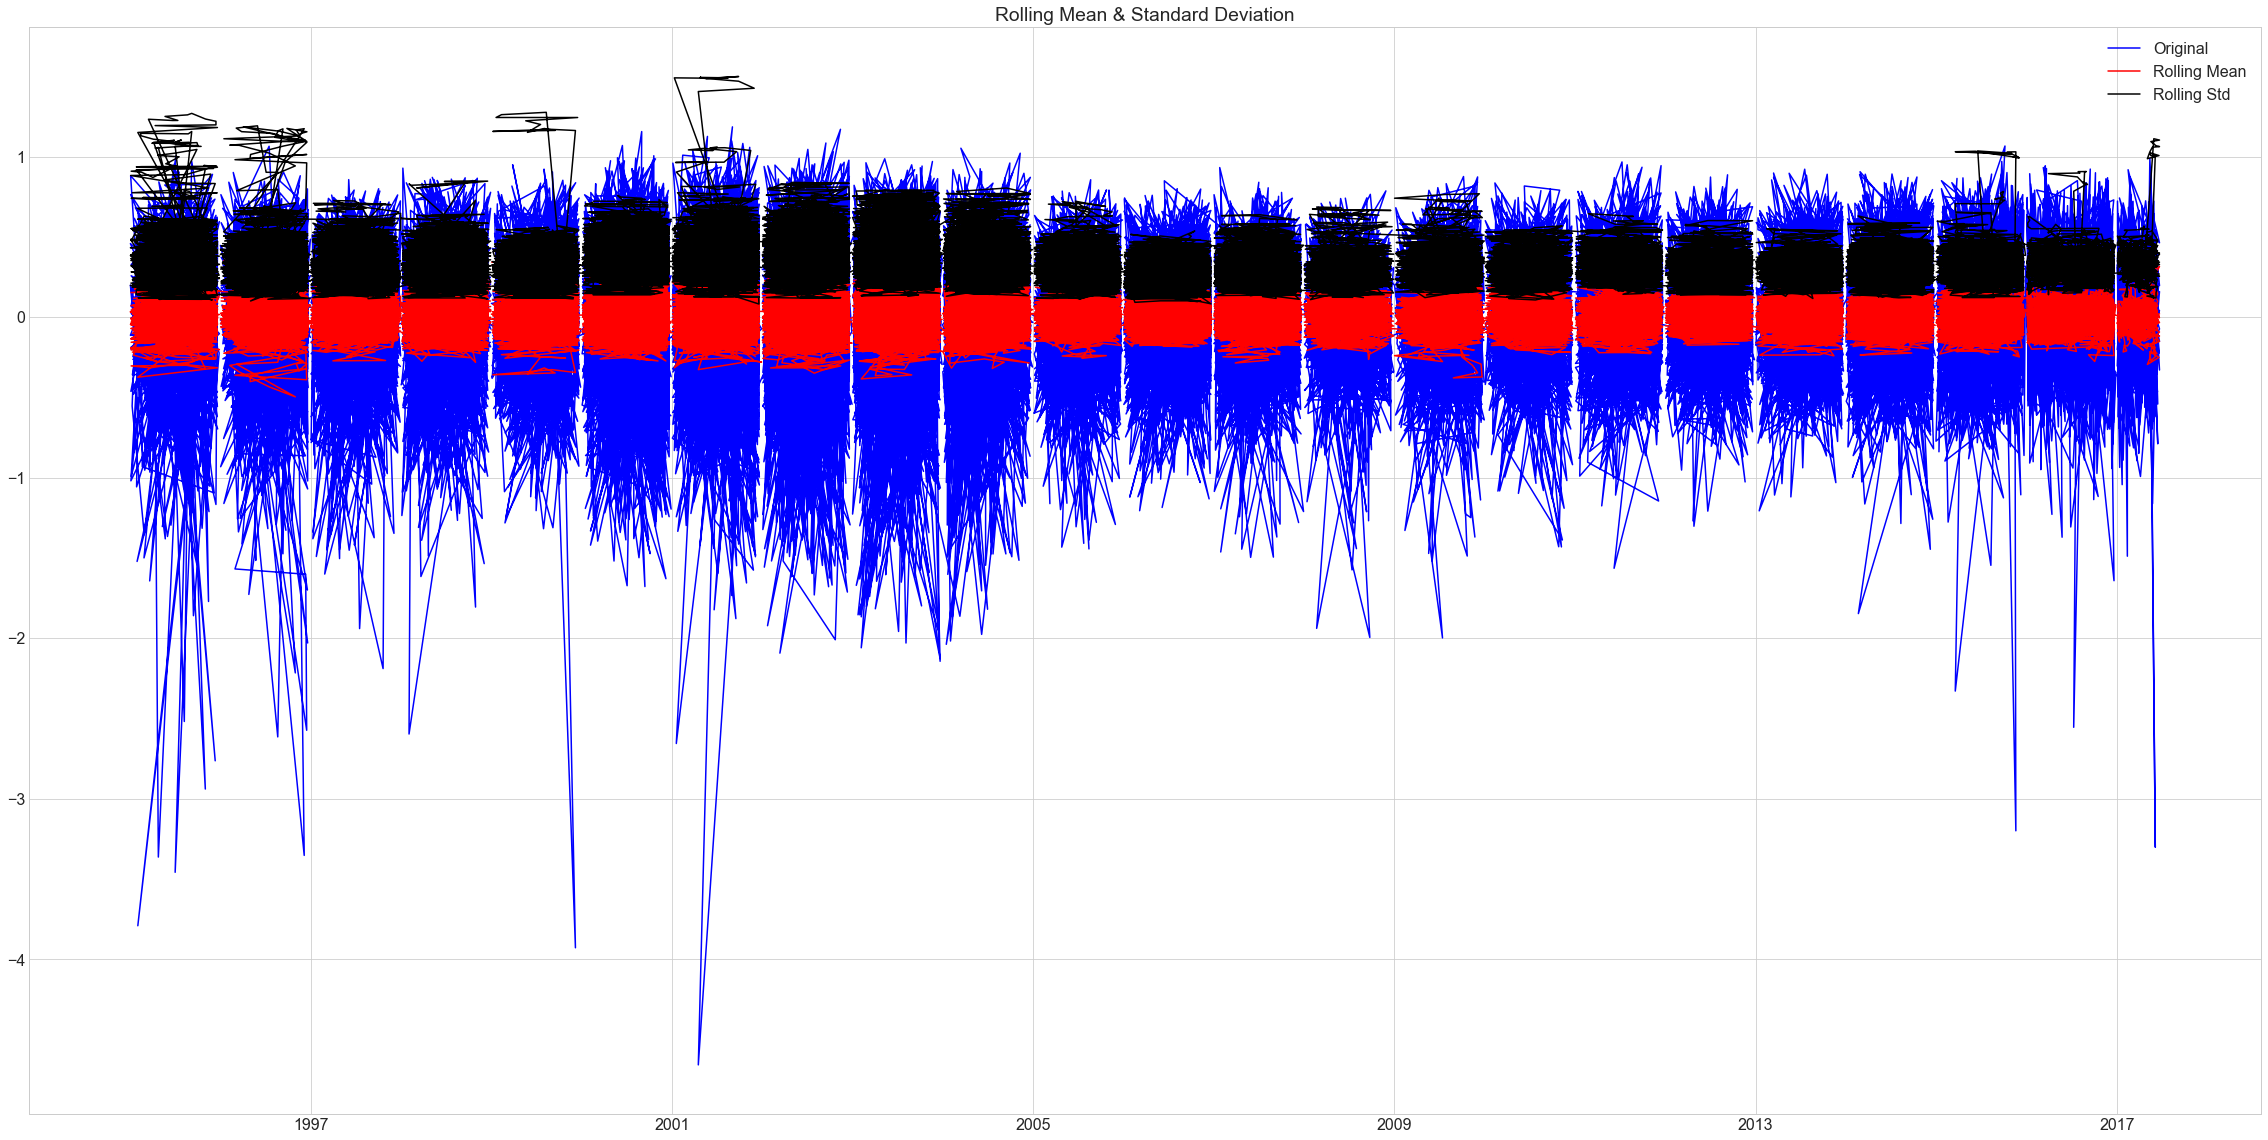

Results of Dickey-Fuller Test:
Test Statistic                   -48.515195
p-value                            0.000000
#Lags Used                        58.000000
Number of Observations Used    52276.000000
Critical Value (1%)               -3.430475
Critical Value (5%)               -2.861595
Critical Value (10%)              -2.566799
dtype: float64


In [20]:
test_stationarity(tslog_smoothed)

There is no longer a specific trend and the test stat is smaller than the 1% critical value, hence, we are 99% confident that the series is stationary.

Seasonality: using decomposistion 

C:\Users\Rory\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


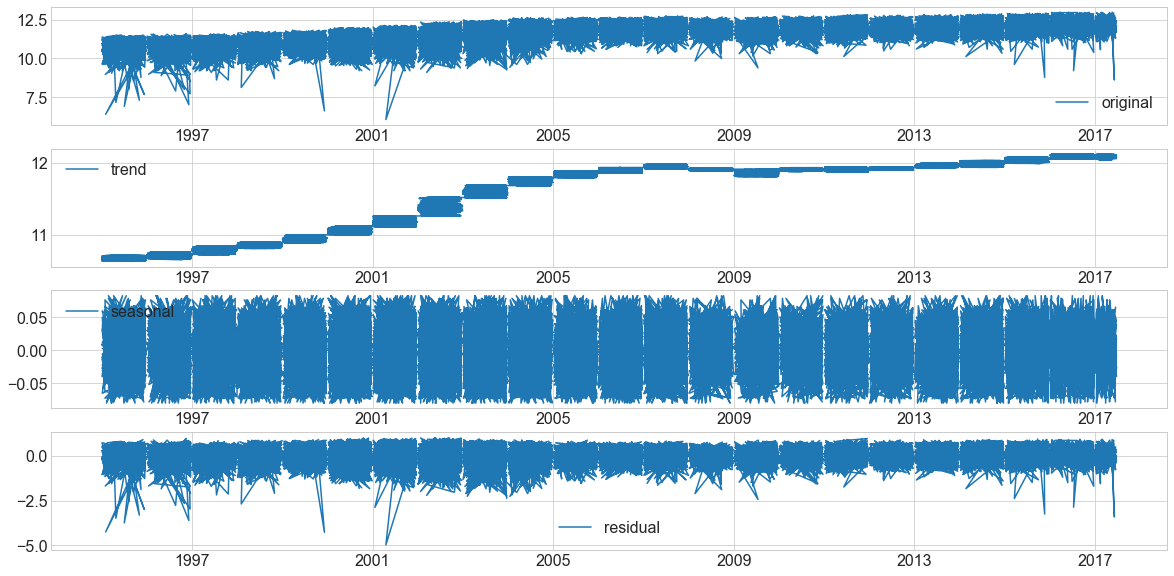

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposistion=seasonal_decompose(tslog,freq=365)

trend=decomposistion.trend
seasonal=decomposistion.seasonal
residual=decomposistion.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(tslog,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')


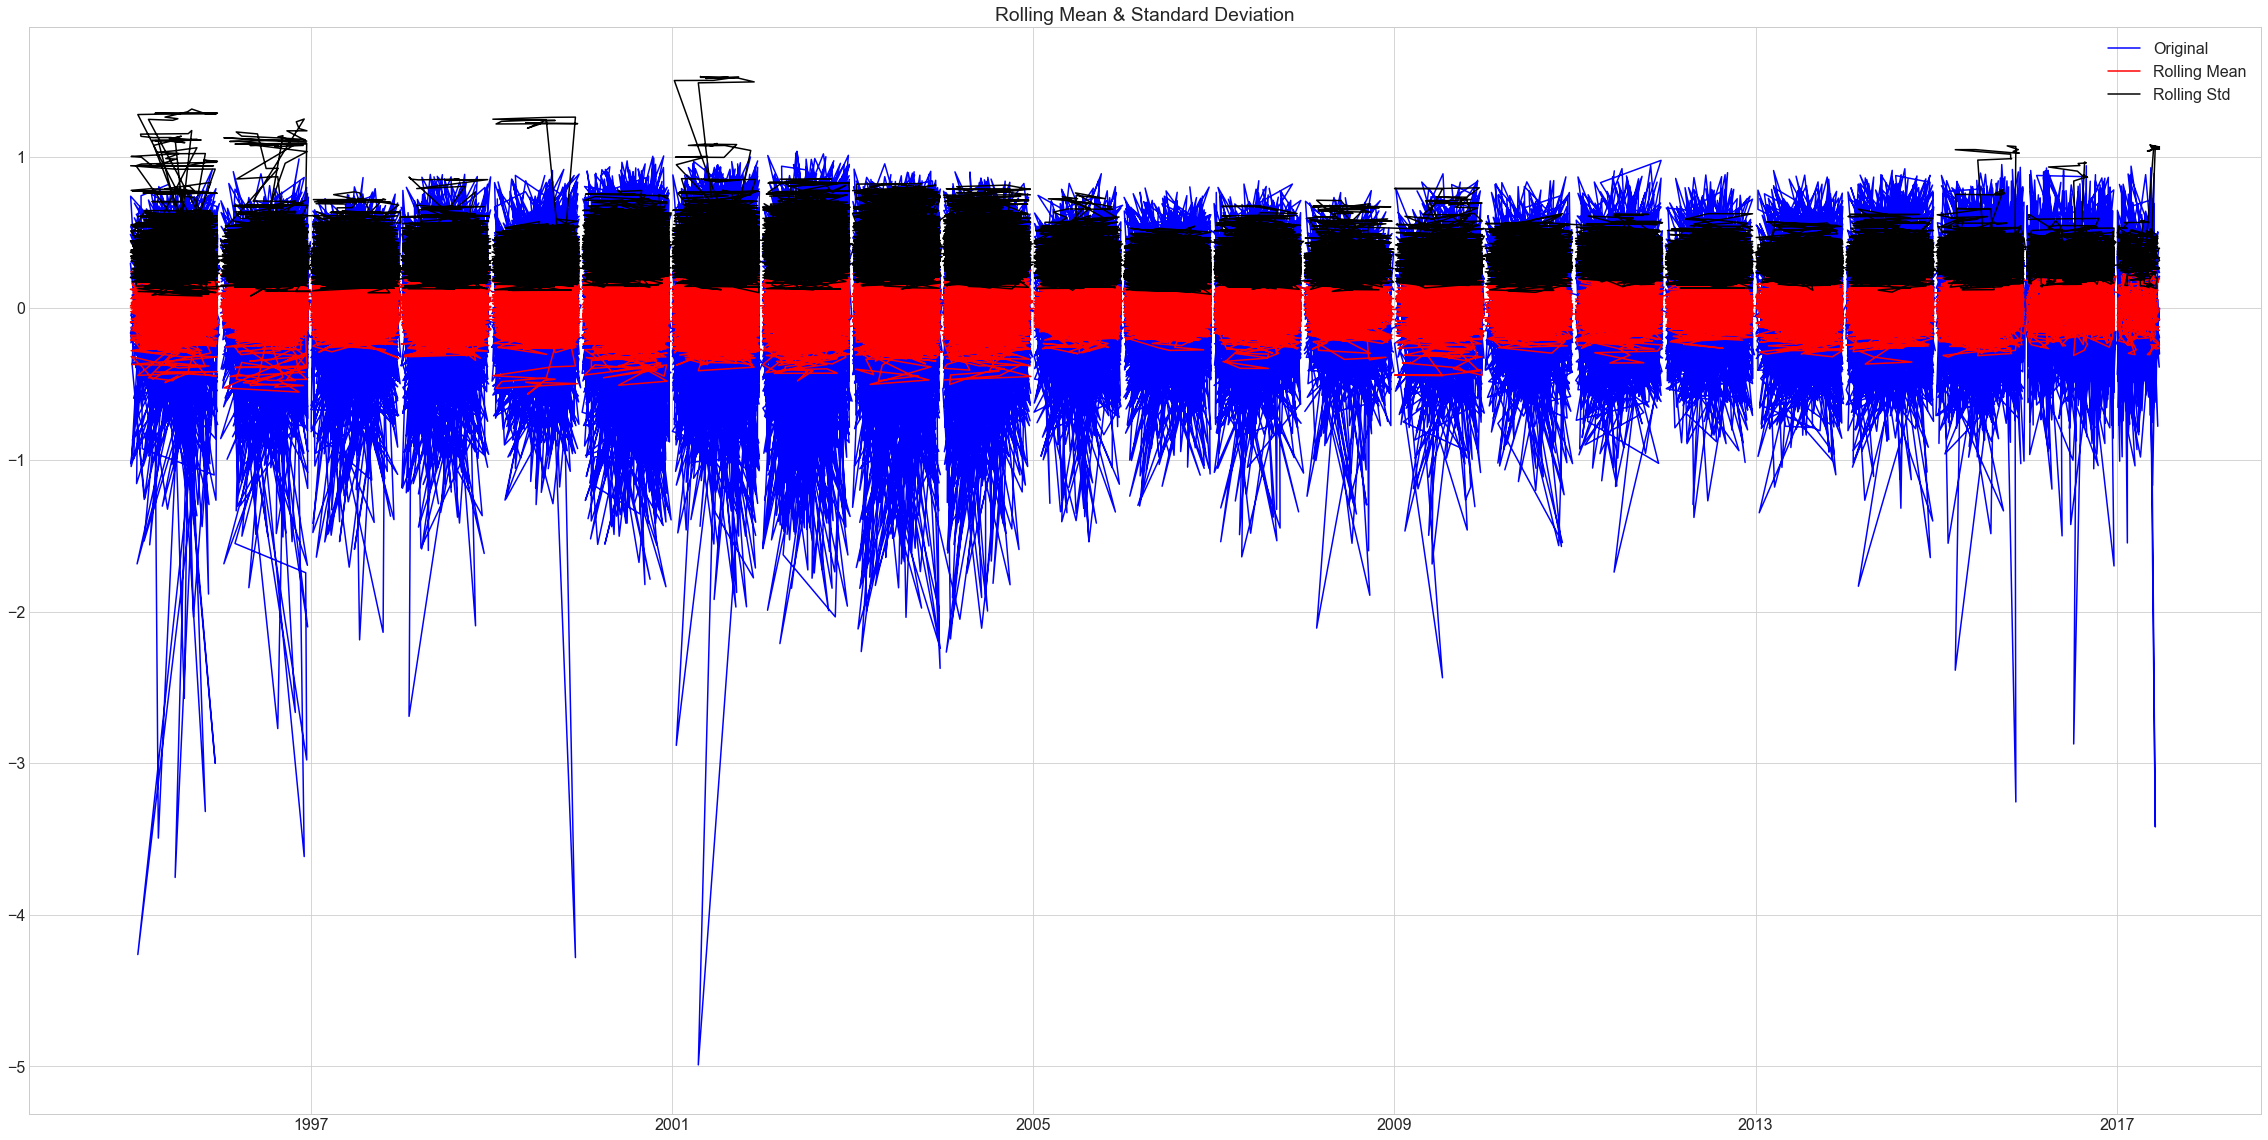

Results of Dickey-Fuller Test:
Test Statistic                  -100.896291
p-value                            0.000000
#Lags Used                         4.000000
Number of Observations Used    51977.000000
Critical Value (1%)               -3.430476
Critical Value (5%)               -2.861596
Critical Value (10%)              -2.566800
dtype: float64


In [22]:
tslogdecomp=residual
tslogdecomp.dropna(inplace=True)
test_stationarity(tslogdecomp)

The decomp method provides the best stationarity. Very little variance can be seen in the mean and std with time.
DATA IS NOW STATIONARY

Text(0.5,1,'Partial Autocorrelation Function')

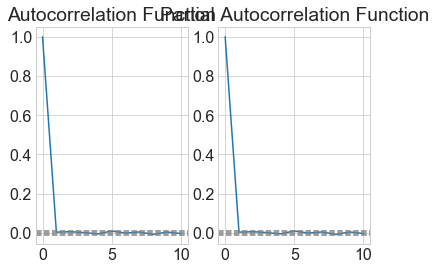

In [25]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(tslogdecomp, nlags=10)
lag_pacf=pacf(tslogdecomp, nlags=10, method='ols')

#plot ACF

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tslogdecomp)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(tslogdecomp)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tslogdecomp)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(tslogdecomp)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')


C:\Users\Rory\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Rory\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: nan')

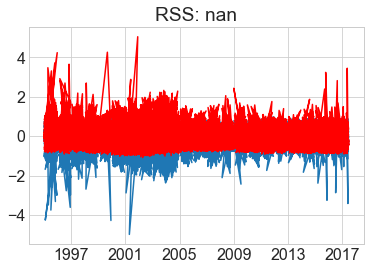

In [26]:
#ARIMA

model= ARIMA(tslog, order=(1,1,1))
results_ARIMA=model.fit(disp=-1)
plt.plot(tslogdecomp)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-tslogdecomp)**2))